No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi


    \begin{table}
    \fontsize{6}{7.2}\selectfont
    \centering
    \caption{This is a table with scientific results.}
    \medskip
    \begin{tabular}{p{.06\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}}
    \hline
    & \multicolumn{2}{l}{AS19}& \multicolumn{2}{l}{Flow Calib.}& \multicolumn{2}{l}{Mass Calib.}& \multicolumn{2}{l}{Flow+Mass Calib.} \\ 
\cline{2-9} \\ 
 & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th]  \\ 
& percentiles & percentiles & percentiles & percentiles & percentiles & percentiles & percentiles & percentiles  \\ 
& (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE)  \\ 
\hline 
RCP 2.6 & 11 [2, 25] & [6, 19 ]& 8 [2, 18] & [4, 14 ]& 9 [4, 14] & [6, 13 ]& 8 [4, 14] & [6, 12 ] \\ 
RCP 4.5 & 15 [4, 30] & [8, 23 ]& 11 [3, 24] & [6, 18 ]& 12 [5, 20] 

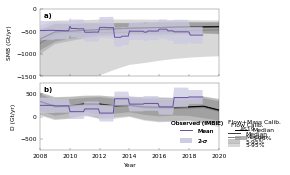

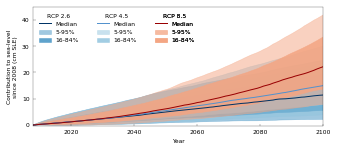

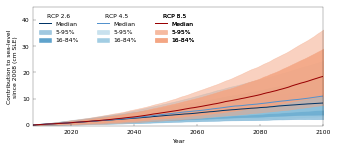

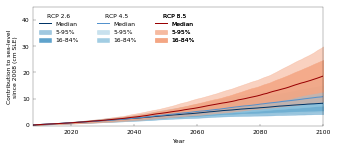

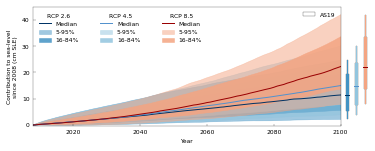

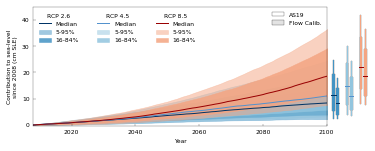

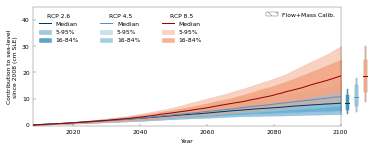

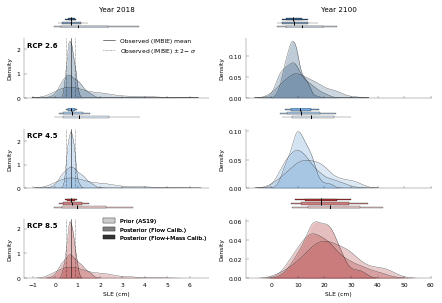

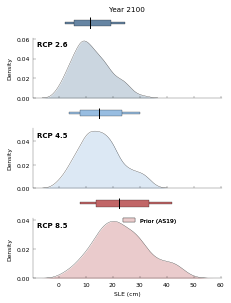

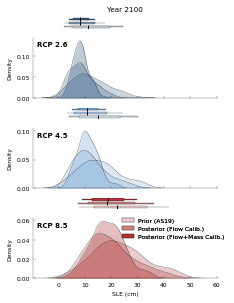

In [95]:
run calibrate-as19.py      

In [92]:
def plot_posterior_sle_pdf(
    out_filename,
    df,
    observed=None,
    year=2100,
    ensembles = ["AS19", "Flow Calib.", "Flow+Mass Calib."],
    ylim=None,
):

    
    alphas = [0.8, 0.9, 1.0]
    m_alphas = alphas[:len(ensembles)]
    fig, axs = plt.subplots(
        6,
        1,
        sharex="col",
        figsize=[3.2, 4.2],
        gridspec_kw=dict(height_ratios=[0.75, 4] * 3),
    )
    fig.subplots_adjust(hspace=0.0, wspace=-0.0)
    for k, rcp in enumerate(rcps):
        y_df = df[df["Year"] == year]
        q_df = make_quantile_df(y_df, quantiles=[0.05, 0.16, 0.5, 0.84, 0.95])

        m_df = y_df[y_df["RCP"] == rcp]
        p_df = q_df[q_df["RCP"] == rcp]

        sns.kdeplot(
            data=m_df,
            x="SLE (cm)",
            hue="Ensemble",
            hue_order=ensembles,
            common_norm=False,
            common_grid=True,
            multiple="layer",
            fill=True,
            lw=0,
            palette=[color_tint(rcp_col_dict[rcp], alpha) for alpha in m_alphas],
            ax=axs[k * 2 + 1],
        )

        sns.kdeplot(
            data=m_df,
            x="SLE (cm)",
            hue="Ensemble",
            hue_order=ensembles,
            common_norm=False,
            common_grid=True,
            multiple="layer",
            fill=False,
            lw=0.25,
            palette=["k"] * len(ensembles),
            ax=axs[k * 2 + 1],
        )

        for e, ens in enumerate(ensembles):
            s_df = p_df[p_df["Ensemble"] == ens]
            mk_df = y_df[y_df["Ensemble"] == ens]

            alpha = alphas[e] - 0.2 * (len(ensembles) - e)
            m_color = color_tint(rcp_col_dict[rcp], alpha)
            lw = 0.25

            axs[(k * 2)].vlines(s_df[[0.5]].values[0][0], e, e + 1, colors="k", lw=1)

            rect1 = plt.Rectangle(
                (s_df[[0.05]].values[0][0], e + 0.4),
                s_df[[0.95]].values[0][0] - s_df[[0.05]].values[0][0],
                0.2,
                color=m_color,
                alpha=1,
                lw=0,
            )
            rect2 = plt.Rectangle(
                (s_df[[0.16]].values[0][0], e + 0.2),
                s_df[[0.84]].values[0][0] - s_df[[0.16]].values[0][0],
                0.6,
                color=m_color,
                alpha=1,
                lw=0,
            )
            rect3 = plt.Rectangle(
                (s_df[[0.05]].values[0][0], e + 0.4),
                s_df[[0.95]].values[0][0] - s_df[[0.05]].values[0][0],
                0.2,
                color="k",
                alpha=1,
                fill=False,
                lw=lw,
            )
            rect4 = plt.Rectangle(
                (s_df[[0.16]].values[0][0], e + 0.2),
                s_df[[0.84]].values[0][0] - s_df[[0.16]].values[0][0],
                0.6,
                color="k",
                alpha=1,
                fill=False,
                lw=lw,
            )

            axs[(k * 2)].add_patch(rect1)
            axs[(k * 2)].add_patch(rect3)
            axs[(k * 2)].add_patch(rect2)
            axs[(k * 2)].add_patch(rect4)

            axs[(k * 2)].set_ylabel(None)
            axs[(k * 2)].axes.xaxis.set_visible(False)
            axs[(k * 2)].axes.yaxis.set_visible(False)
            sns.despine(ax=axs[(k * 2)], left=True, bottom=True)
            sns.despine(ax=axs[(k * 2) + 1], top=True)

            axs[(k * 2)].set_ylim(0, len(ensembles))
            if ylim is not None:
                axs[(k * 2) + 1].set_ylim(ylim)

            axs[k].legend().remove()
            axs[k * 2 + 1].legend().remove()

            axs[0].set_title(f"Year {year}")

        if observed is not None:
            obs = observed[(observed["Year"] >= years[0]) & (observed["Year"] < years[0] + 1)]
            obs_mean = obs["SLE (cm)"].mean()
            obs_std = obs["SLE uncertainty (cm)"].mean()
            axs[(k * 2) + 1].axvline(obs_mean, c="k", lw=0.5)
            axs[(k * 2) + 1].axvline(obs_mean - 2 * obs_std, c="k", lw=0.5, ls="dotted")
            axs[(k * 2) + 1].axvline(obs_mean + 2 * obs_std, c="k", lw=0.5, ls="dotted")

    for k, rcp in enumerate(rcps):
        add_inner_title(axs[k * 2 + 1], rcp_dict[rcp])

    l_as19 = Patch(
        facecolor=color_tint(rcp_col_dict[rcp], alphas[0]- 0.6), edgecolor="0.0", linewidth=0.25, label="Prior (AS19)"
    )
    l_flow = Patch(
        facecolor=color_tint(rcp_col_dict[rcp], alphas[1]- 0.4),
        edgecolor="0.0",
        linewidth=0.25,
        label="Posterior (Flow Calib.)",
    )
    l_calib = Patch(
        facecolor=color_tint(rcp_col_dict[rcp], alphas[2]- 0.2),
        edgecolor="0.0",
        linewidth=0.25,
        label="Posterior (Flow+Mass Calib.)",
    )


    ens_label_dict = {"AS19": l_as19, "Flow Calib.": l_flow, "Flow+Mass Calib.": l_calib}

    legend_1 = axs[-1].legend(
        handles=[ens_label_dict[e] for e in ensembles],
        loc="upper left",
        bbox_to_anchor=(0.45, 1.1, 0, 0),
    )
    legend_1.get_frame().set_linewidth(0.0)
    legend_1.get_frame().set_alpha(0.0)
    axs[-1].add_artist(legend_1)

    if observed:
        l_obs_mean = Line2D([], [], c="k", lw=0.5, ls="solid", label="Observed (IMBIE) mean")
        l_obs_std = Line2D([], [], c="k", lw=0.5, ls="dotted", label="Observed (IMBIE) $\pm2-\sigma$")
        legend_2 = axs[1].legend(
            handles=[l_obs_mean, l_obs_std],
            loc="upper left",
            bbox_to_anchor=(0.45, 1.1, 0, 0),
        )
        legend_2.get_frame().set_linewidth(0.0)
        legend_2.get_frame().set_alpha(0.0)

    fig.tight_layout()
    fig.savefig(out_filename)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


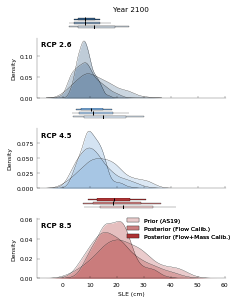

In [93]:
    year = 2100
    plot_posterior_sle_pdf(f"sle_pdf_{year}.pdf", all_df, ensembles=["AS19", "Flow Calib.", "Flow+Mass Calib."], year=year)


In [56]:
color_tint(rcp_col_dict[26], alphas[0])

array([0.2       , 0.36078431, 0.51764706])

In [20]:

def plot_posterior_sle_pdfs(
    out_filename,
    df,
    observed=None,
    years=[2018, 2100],
):

    ensembles = ["AS19", "Flow Calib.", "Flow+Mass Calib."]
    alphas = [0.8, 0.9, 1.0]

    fig, axs = plt.subplots(
        6,
        2,
        sharex="col",
        figsize=[6.2, 4.2],
        gridspec_kw=dict(height_ratios=[0.75, 4] * 3),
    )
    fig.subplots_adjust(hspace=0.0, wspace=-0.0)
    for k, rcp in enumerate(rcps):
        for y, year in enumerate(years):
            y_df = df[df["Year"] == year]
            q_df = make_quantile_df(y_df, quantiles=[0.05, 0.16, 0.5, 0.84, 0.95])

            m_df = y_df[y_df["RCP"] == rcp]
            p_df = q_df[q_df["RCP"] == rcp]

            sns.kdeplot(
                data=m_df,
                x="SLE (cm)",
                hue="Ensemble",
                hue_order=ensembles,
                common_norm=False,
                common_grid=True,
                multiple="layer",
                fill=True,
                lw=0,
                palette=[color_tint(rcp_col_dict[rcp], alpha) for alpha in alphas],
                ax=axs[k * 2 + 1, y],
            )

            sns.kdeplot(
                data=m_df,
                x="SLE (cm)",
                hue="Ensemble",
                hue_order=ensembles,
                common_norm=False,
                common_grid=True,
                multiple="layer",
                fill=False,
                lw=0.25,
                palette=["k"] * len(ensembles),
                ax=axs[k * 2 + 1, y],
            )

            for e, ens in enumerate(ensembles):
                s_df = p_df[p_df["Ensemble"] == ens]
                mk_df = y_df[y_df["Ensemble"] == ens]

                alpha = alphas[e] - 0.2 * (len(ensembles) - e)
                m_color = color_tint(rcp_col_dict[rcp], alpha)
                lw = 0.25


                axs[(k*2), y].vlines(s_df[[0.5]].values[0][0], e, e+1, colors="k", lw=1)

                rect1 = plt.Rectangle(
                    (s_df[[0.05]].values[0][0], e + 0.4),
                    s_df[[0.95]].values[0][0] - s_df[[0.05]].values[0][0],
                    0.2,
                    color=m_color,
                    alpha=1,
                    lw=0,
                )
                rect2 = plt.Rectangle(
                    (s_df[[0.16]].values[0][0], e + 0.2),
                    s_df[[0.84]].values[0][0] - s_df[[0.16]].values[0][0],
                    0.6,
                    color=m_color,
                    alpha=1,
                    lw=0,
                )
                rect3 = plt.Rectangle(
                    (s_df[[0.05]].values[0][0], e + 0.4),
                    s_df[[0.95]].values[0][0] - s_df[[0.05]].values[0][0],
                    0.2,
                    color="k",
                    alpha=1,
                    fill=False,
                    lw=lw,
                )
                rect4 = plt.Rectangle(
                    (s_df[[0.16]].values[0][0], e + 0.2),
                    s_df[[0.84]].values[0][0] - s_df[[0.16]].values[0][0],
                    0.6,
                    color="k",
                    alpha=1,
                    fill=False,
                    lw=lw,
                )

                axs[(k * 2), y].add_patch(rect1)
                axs[(k * 2), y].add_patch(rect3)
                axs[(k * 2), y].add_patch(rect2)
                axs[(k * 2), y].add_patch(rect4)
                # axs[(k * 2), y].add_patch(rect0)

                axs[(k * 2), y].set_ylabel(None)
                axs[(k * 2), y].axes.xaxis.set_visible(False)
                axs[(k * 2), y].axes.yaxis.set_visible(False)
                sns.despine(ax=axs[(k * 2), y], left=True, bottom=True)
                sns.despine(ax=axs[(k * 2) + 1, y], top=True)

                axs[(k * 2), y].set_ylim(0, len(ensembles))
                
                axs[k,y ].legend().remove()
                axs[k * 2 + 1,y].legend().remove()

                axs[0, y].set_title(f"Year {year}")



        if observed is not None:
            obs = observed[(observed["Year"] >= years[0]) & (observed["Year"] < years[0] + 1)]
            obs_mean = obs["SLE (cm)"].mean()
            obs_std = obs["SLE uncertainty (cm)"].mean()
            axs[(k * 2) + 1, 0].axvline(obs_mean, c="k", lw=0.5)
            axs[(k * 2) + 1, 0].axvline(obs_mean - 2 * obs_std, c="k", lw=0.5, ls="dotted")
            axs[(k * 2) + 1, 0].axvline(obs_mean + 2 * obs_std, c="k", lw=0.5, ls="dotted")


    for k, rcp in enumerate(rcps):
        add_inner_title(axs[k * 2 + 1,0], rcp_dict[rcp])


    l_as19 = Patch(
        facecolor=str(alphas[2] - 0.2 * (len(ensembles) - 2)), edgecolor="0.0", linewidth=0.25, label="Prior (AS19)"
    )
    l_mass = Patch(
        facecolor=str(alphas[1] - 0.2 * (len(ensembles) - 1)),
        edgecolor="0.0",
        linewidth=0.25,
        label="Posterior (Flow Calib.)",
    )
    l_calib = Patch(
        facecolor=str(alphas[0] - 0.2 * (len(ensembles) - 0)),
        edgecolor="0.0",
        linewidth=0.25,
        label="Posterior (Flow+Mass Calib.)",
    )

    legend_1 = axs[-1, 0].legend(
        handles=[l_as19, l_mass, l_calib],
        loc="upper left",
        bbox_to_anchor=(0.4, 1.1, 0, 0),
    )
    legend_1.get_frame().set_linewidth(0.0)
    legend_1.get_frame().set_alpha(0.0)
    axs[-1, 0].add_artist(legend_1)

    fig.tight_layout()
    fig.savefig(out_filename)



In [ ]:

plot_posterior_sle_pdfs(f"sle_pdf_2018_2100.pdf", all_df, observed=observed)


In [ ]:
!open sle_pdf_2018_2100.pdf

In [ ]:
!open sle_pdf_2018.0.pdf

In [ ]:
plt.vlines?

In [ ]:
np.linspace(0, 292, 293)

In [34]:
a = [0.8, 0.9, 1.0]

In [36]:
a[:3]

[0.8, 0.9, 1.0]